In [1]:
import os
import sys
import os
from icecream import ic 
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

2022-10-04 15:10:55.452574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 15:10:55.523033: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-04 15:10:55.541190: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-04 15:10:55.902770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
os.environ["LD_LIBRARY_PATH"]

'/usr/local//lib::/home/boggog/anaconda3/lib/:/home/boggog/anaconda3/envs/symba/lib/'

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-10-04 15:10:58.673184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 15:10:58.676751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 15:10:58.676877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
os.listdir("../../..")

['.git',
 'README.md',
 '.gitignore',
 'sympy-prefix',
 'data-generation-marty',
 'data.nosync',
 'models',
 'data-preprocessing',
 'train_test_split.ipynb']

In [4]:
amplitudes_files = [
    "../../../data.nosync/train/QED_amplitudes_TreeLevel_1to2_train.txt",
    "../../../data.nosync/train/QED_amplitudes_TreeLevel_2to1_train.txt",
    "../../../data.nosync/train/QED_amplitudes_TreeLevel_2to2_train.txt",
    "../../../data.nosync/train/QED_amplitudes_TreeLevel_2to3_train.txt",
    "../../../data.nosync/train/QED_amplitudes_TreeLevel_3to2_train.txt",
]
sqamplitudes_files = [
    "../../../data.nosync/train/QED_sqamplitudes_TreeLevel_1to2_simplified_shortened_hybridprefix_train.txt",
    "../../../data.nosync/train/QED_sqamplitudes_TreeLevel_2to1_simplified_shortened_hybridprefix_train.txt",
    "../../../data.nosync/train/QED_sqamplitudes_TreeLevel_2to2_simplified_shortened_hybridprefix_train.txt",
    "../../../data.nosync/train/QED_sqamplitudes_TreeLevel_2to3_simplified_shortened_hybridprefix_train.txt",
    "../../../data.nosync/train/QED_sqamplitudes_TreeLevel_3to2_simplified_shortened_hybridprefix_train.txt",
]

In [5]:
X_train = []
for file in amplitudes_files:
    with open(file, 'r') as f:
        for line in f.readlines() :
            line = line.split(",")
            line[-1] = line[-1].replace("\n", "")
            X_train.append(line)

y_train = []
for file in sqamplitudes_files:
    with open(file, 'r') as f:
        for line in f.readlines() :
            line = line.split(",")
            line[-1] = line[-1].replace("\n", "")
            # line = ["[START]"] + line + ["[END]"]
            y_train.append(line)

In [6]:
assert len(X_train) == len(y_train)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.02, random_state=42)

In [8]:
ic(len(X_train))
ic(len(X_val))

ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?
ic| Error: Failed to access the underlying source code for analysis. Was ic() invoked in a REPL (e.g. from the command line), a frozen application (e.g. packaged with PyInstaller), or did the underlying source code change during execution?


4770

# Creating the Dataset

In [9]:
vocab_size = 500
sequence_length = 350
batch_size = 8

In [10]:
X_train_idx_okay = np.where([len(x) < sequence_length for x in X_train])[0]
y_train_idx_okay = np.where([len(y) < sequence_length for y in y_train])[0]
train_idx_okay = np.intersect1d(X_train_idx_okay, y_train_idx_okay) 
X_train_short = [X_train[i] for i in train_idx_okay]
y_train_short = [y_train[i] for i in train_idx_okay]
X_train_text = [" ".join(x) for x in X_train_short]
y_train_text = [" ".join(yy) for yy in y_train_short]

print("X train: {}% okay".format(len(X_train_idx_okay)/len(X_train)))
print("y train: {}% okay".format(len(y_train_idx_okay)/len(X_train)))


X_val_idx_okay = np.where([len(x) < sequence_length for x in X_val])[0]
y_val_idx_okay = np.where([len(y) < sequence_length for y in y_val])[0]
val_idx_okay = np.intersect1d(X_val_idx_okay, y_val_idx_okay) 
X_val_short = [X_val[i] for i in val_idx_okay]
y_val_short = [y_val[i] for i in val_idx_okay]
X_val_text = [" ".join(x) for x in X_val_short]
y_val_text = [" ".join(yy) for yy in y_val_short]

print("X val: {}% okay".format(len(X_val_idx_okay)/len(X_val)))
print("y val: {}% okay".format(len(y_val_idx_okay)/len(X_val)))

X train: 0.9461537474167918% okay
y train: 0.8247140821749008% okay
X val: 0.9410901467505242% okay
y val: 0.8169811320754717% okay


In [11]:
def custom_standardization(input_string):
    return input_string

X_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
    standardize=None,
)

y_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length+1,
    standardize=None,
)

2022-10-04 15:11:18.497506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 15:11:18.499344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 15:11:18.499515: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 15:11:18.499585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

In [12]:
X_vectorization.adapt(X_train_text)
y_vectorization.adapt(y_train_text)

In [13]:
def format_dataset(X, y):
    X_vec = X_vectorization(X)
    y_vec = y_vectorization(y)
    return (
        {
            "encoder_inputs": X_vec,
            "decoder_inputs": y_vec[:, :-1],
        },
        y_vec[:, 1:],
    )


def make_dataset(X_text, y_text):
    dataset = tf.data.Dataset.from_tensor_slices((X_text, y_text))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()


train_ds = make_dataset(X_train_text, y_train_text)
val_ds = make_dataset(X_val_text, y_val_text)
# test_ds = make_dataset(X_test_text, y_test_text)

# Model

In [14]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

In [15]:
embed_dim = 256  # 512
latent_dim = 2048  # 16384
num_heads = 8

# with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
encoder_inputs = keras.Input(shape=(None,), dtype="int32", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None,), dtype="int32", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)
transformer.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding (Position  (None, None, 256)   217600      ['encoder_inputs[0][0]']         
 alEmbedding)                                                                                     
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 transformer_encoder (Transform  (None, None, 256)   3155456     ['positional_embedding[

In [16]:
def create_lr_func(min_lr, max_epochs, max_lr_factor=4.0):
    initial_lr = min_lr 
    max_lr = min_lr*max_lr_factor 
    def learning_rate_cyclic(epoch):
        if epoch <= (max_epochs / 2):
            lr = initial_lr + (max_lr-initial_lr) * epoch/(max_epochs/2)
            return lr
        if (epoch > (max_epochs / 2)) & (epoch < max_epochs):
            lr = max_lr - (max_lr-initial_lr) * (epoch-max_epochs/2)/(max_epochs/2)
            return lr
        else:
            lr = initial_lr*np.exp(-(epoch-max_epochs)/10)
            return lr
    return learning_rate_cyclic

Text(0, 0.5, 'learning rate')

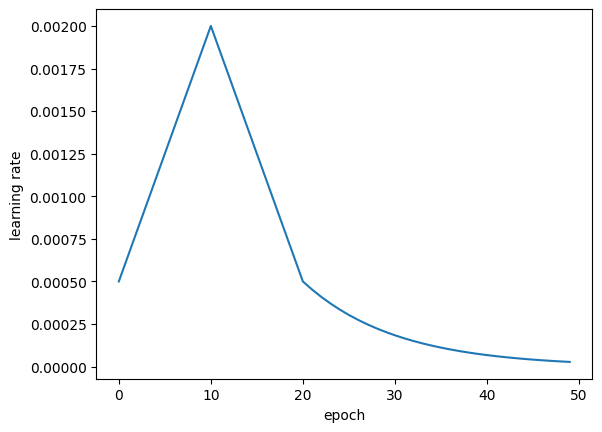

In [17]:
xrange = range(0,50)
yrange = [create_lr_func(0.0005, 20, 4.0)(x) for x in xrange]
plt.plot(xrange, yrange)
plt.xlabel("epoch")
plt.ylabel("learning rate")

In [18]:
epochs = 50  # This should be at least 30 for convergence
lr_schedule = tf.keras.callbacks.LearningRateScheduler(create_lr_func(0.0005, 20, 4.0))
checkpoint = keras.callbacks.ModelCheckpoint(
    "models/2022-10-04-Transformer_3to2", save_best_only=True, monitor="val_loss", save_weights_only=True
)

callbacks = [lr_schedule, checkpoint]

transformer.summary()
transformer.compile(
    "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds,
                          callbacks = callbacks)


Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding (Position  (None, None, 256)   217600      ['encoder_inputs[0][0]']         
 alEmbedding)                                                                                     
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 transformer_encoder (Transform  (None, None, 256)   3155456     ['positional_embedding[

2022-10-04 15:11:50.552645: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


    1/23403 [..............................] - ETA: 16:31:51 - loss: 4.5059 - accuracy: 0.0011

2022-10-04 15:11:50.949883: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


22817/23403 [============================>.] - ETA: 30s - loss: 0.1999 - accuracy: 0.8955

2022-10-04 15:31:33.470482: W tensorflow/core/framework/op_kernel.cc:1768] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: Graph execution error:

Detected at node 'transformer/transformer_encoder/multi_head_attention/softmax/add' defined at (most recent call last):
    File "/usr/lib64/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib64/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/boggog/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/boggog/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib64/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib64/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib64/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_27295/2141404511.py", line 13, in <module>
      history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds,
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/tmp/ipykernel_27295/4229647724.py", line 20, in call
      attention_output = self.attention(
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 596, in call
      attention_output, attention_scores = self._compute_attention(
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 527, in _compute_attention
      attention_scores = self._masked_softmax(
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 493, in _masked_softmax
      return self._softmax(attention_scores, attention_mask)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/activation/softmax.py", line 95, in call
      inputs += adder
Node: 'transformer/transformer_encoder/multi_head_attention/softmax/add'
Detected at node 'transformer/transformer_encoder/multi_head_attention/softmax/add' defined at (most recent call last):
    File "/usr/lib64/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib64/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/boggog/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 978, in launch_instance
      app.start()
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/boggog/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib64/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib64/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib64/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/boggog/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/boggog/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_27295/2141404511.py", line 13, in <module>
      history = transformer.fit(train_ds, epochs=epochs, validation_data=val_ds,
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/tmp/ipykernel_27295/4229647724.py", line 20, in call
      attention_output = self.attention(
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 596, in call
      attention_output, attention_scores = self._compute_attention(
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 527, in _compute_attention
      attention_scores = self._masked_softmax(
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/attention/multi_head_attention.py", line 493, in _masked_softmax
      return self._softmax(attention_scores, attention_mask)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/boggog/.local/lib/python3.10/site-packages/keras/layers/activation/softmax.py", line 95, in call
      inputs += adder
Node: 'transformer/transformer_encoder/multi_head_attention/softmax/add'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node transformer/transformer_encoder/multi_head_attention/softmax/add}}]]
	 [[broadcast_weights_1/assert_broadcastable/is_valid_shape/else/_1/broadcast_weights_1/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/then/_53/broadcast_weights_1/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/concat/_100]]
  (1) INVALID_ARGUMENT:  required broadcastable shapes
	 [[{{node transformer/transformer_encoder/multi_head_attention/softmax/add}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_29260]